https://github.com/Phlya/adjustText

In [2]:
import plotnine
from plotnine import *
from plotnine.data import mtcars
import pandas as pd
plotnine.options.figure_size = (10,6)

In [7]:
mtcars.head(3)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


No ggrepel/adjustText

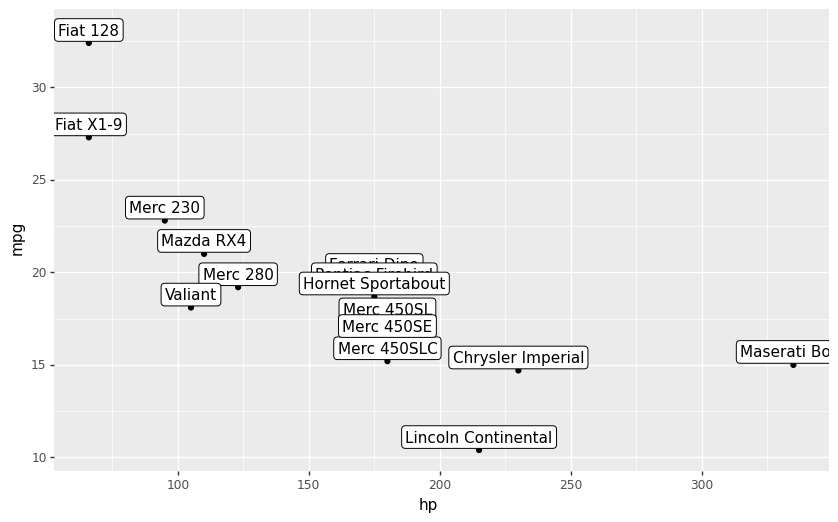

<ggplot: (8743919484853)>

In [9]:
(ggplot(mtcars.sample(15,random_state=42), aes('hp', 'mpg'))
 + geom_point() +
 geom_label(aes(label='name'),nudge_y=0.7,show_legend=False)
)

With ggrepel/adjustText (this overrides nudge_x and nudge_y arguments in geom_label)

References:

* https://adjusttext.readthedocs.io/en/latest/#module-adjustText 
* https://github.com/Phlya/adjustText/blob/master/docs/source/Examples.ipynb

Notes:

* Use only_move to lock which axis labels are moved on
* Use tuples on expand_points and force_points (x,y) to adjust label position with respect to the points
* va = 'bottom' seems to nudge the labels on top of the points

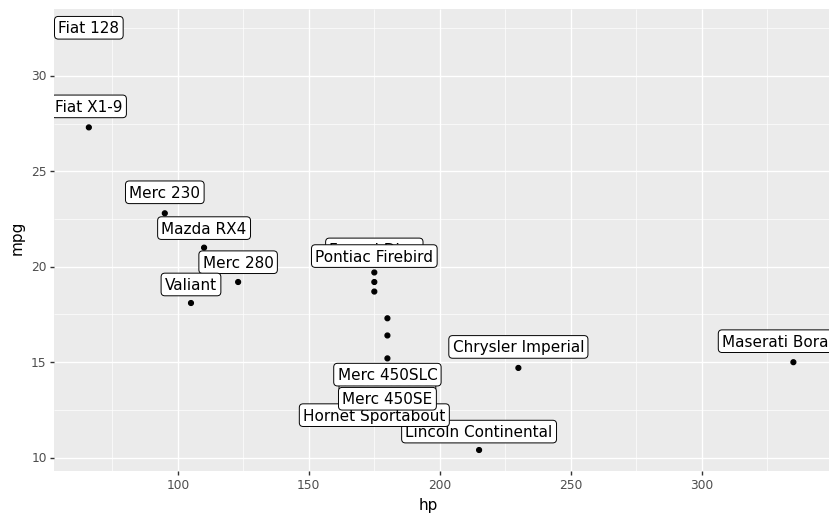

<ggplot: (8743919443817)>

In [54]:
(ggplot(mtcars.sample(15,random_state=42), aes('hp', 'mpg'))
 + geom_point() +
 geom_label(aes(label='name'),show_legend=False,
           adjust_text= dict(
           expand_points=(1,2.5),    
           force_points = (1.0,1.2),
           autoalign=False, only_move={'points':'y', 'text':'y', 'objects':'y'},
                va='bottom'))
)

## Scrap

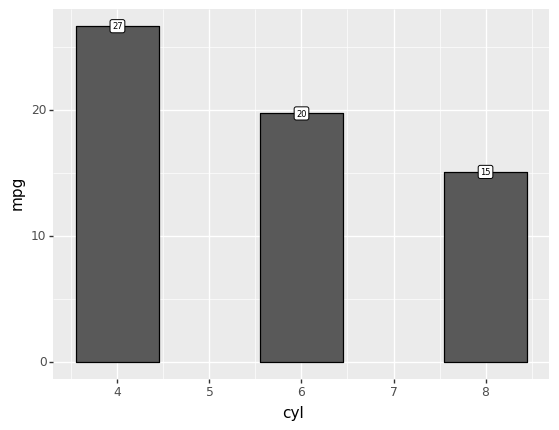

<ggplot: (8749207300077)>

In [30]:
mtcars_summ = mtcars.groupby("cyl").agg({"mpg":'mean'}).reset_index()
mtcars_summ['mean_mpg'] = mtcars_summ['mpg'].apply(round)
(ggplot(mtcars_summ, aes('cyl', 'mpg'))
 + geom_bar(stat='identity',color='black') +
 geom_label(aes(label='mean_mpg',size=20),show_legend=False)
)